In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
%matplotlib inline

# Week 5 Questions

## Q1.Simple 1D Integration with Euler

Consider the differential equation defined by: $f(x) = \frac{dx}{dt} = -5x$. The analytical solution to this is then: $x(t) = Ae^{-5t}$. Consider the initial condition: $x(0) = 1$. Then the analytical solution is $x(t) = e^{-5t}$. 

a) Solve this ODE from t = 0 to t = 2 using euler's method and plot the results.

b) Compare the final result at t = 2 to the analytical result for t = 2. Caclulate the error.

c) Compute the error for 5-8 different values of dt. Store the results for later use.

0.2503963339834618

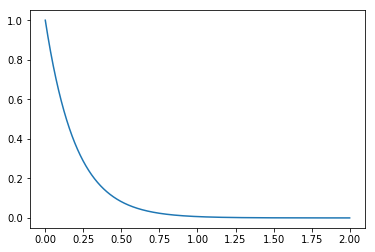

In [15]:
def f(x):
    return -5*x

def euler(x0, dt):
    return x0 + f(x0) * dt

def integrate(dt):
    x = 1.
    
    x_res = []
    t_res = []
    t = 0.
    
    while t <= 2.:
        x_res.append(x)
        t_res.append(t)
        
        t += dt
        x = euler(x, dt)
        
    return x_res, t_res
        
x, t = integrate(0.0001)

plt.plot(t, x)

err = abs((x[-1] - np.exp(-5 * t[-1])) / x[-1])
err * 100

## Q2. The midpoint method

We defined Euler's method in general as:

$$ x_{n+1} = x_n + f(x) \Delta t$$

Where our ODE is of the form: $\frac{dx}{dt} = f(x) $. 

Then in the same way we can define a more advanced method, the midpoint method, which uses a better centered approximation of the slope of the function. It is defined as follows:

$$ x_{n+1} = x_n + \Delta t \ f\left(x_n + \frac{\Delta t}{2} \ f(x_n) \right) $$

a) Implement the midpoint integrator and test it with the same function as in Q1.

b) Repeat all the steps in Q1 for the midpoint integrator

c) Plot err vs dt for both integrators on the same plot. Compare the shape and birefly discuss what this means about the error scaling of the integrator.

## Q3. Analysis of the Kinematics Solution

As our first example of numerical integration, we solved the solution of a particle launched at a certain angle and velocity. We want to check that the results follow what we expect given what we know about kinematics. 

We will take a graphical approach. Recreate the solution and plot the results of y vs t. Then using the methods from the previous weeks fit the curve. Look at the parameters of the fit and see if you recognize the coefficients. 

The function is a parabola so it should be able to be fit by some function of the form: 

$$ y = a_1 t^2 + a_2 t + a_3 $$

Your job is to figure out correct values for $a_1$, $a_2$, $a_3$ and comment on whether the results make sense.

## Q4. Symplectic Orbit Integration

So far we have only used non-symplectic integration methods. We will talk more about what symplectic integration means mathematically next week but for now I want you to see what the result of it it. For this we will use the most simple symplectic integrator, the Leapfrog method. This method is very simple but also very powerful and commonly used in questions where we want to ensure energy conservation. This problem explores this method.

The Leapfrog method can be written as:

$$ x_{n+1} = x_n + vx \frac{\Delta t}{2} $$

$$ y_{n+1} = y_n + vy \frac{\Delta t}{2} $$

$$ vx_{n+1} = vx_n + a_x \Delta t $$

$$ vy_{n+1} = vy_n + a_y \Delta t $$

$$ x_{n+1} = x_n + vx \frac{\Delta t}{2} $$

$$ y_{n+1} = y_n + vy \frac{\Delta t}{2} $$

As you can see it is almost as simple as the Euler method but it involves a symmetric integration of the position around the velocity. This symmetry leads to much better results.

a) Implement the leapfrog method for use in the orbit problem.

b) Compare the results of the planetary orbit performed with leapfrog vs Euler. How long can you make the timestep before you start seeing deviations from a circular orbit?

In [17]:
12**2

144

In [18]:
25**2

625

In [19]:
2500 / 4

625.0

In [20]:
625 / 2500

0.25

In [21]:
4 * 144

576

In [22]:
625 - 576

49

In [23]:
50**2

2500

In [24]:
625-49

576

In [25]:
12*12

144

In [26]:
np.sqrt(576)

24.0

In [27]:
15.5/24

0.6458333333333334

In [28]:
import sympy as sp

In [29]:
x = sp.symbols('x')

In [32]:
sp.diff((1/x**2))

-2/x**3